In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

Dataset columns:
1. age: The person’s age in years
2. sex: The person’s sex (1 = male, 0 = female)
3. cp: chest pain type
    — Value 0: asymptomatic
    — Value 1: atypical angina
    — Value 2: non-anginal pain
    — Value 3: typical angina
4. trestbps: The person’s resting blood pressure (mm Hg on  admission to the hospital)
5. chol: The person’s cholesterol measurement in mg/dl
6. fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    — Value 1: normal
    — Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. thalach: The person’s maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
11. slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
    0: downsloping; 1: flat; 2: upsloping
12. ca: The targetber of major vessels (0–3)
13. thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    Value 1: fixed defect (no blood flow in some part of the heart)
    Value 2: normal blood flow
    Value 3: reversible defect (a blood flow is observed but it is not normal)
14. target: Heart disease (1 = no, 0= yes)

In [2]:
x="""age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target""".split("\n")

In [3]:
col=[i.split("/")[0].strip() for i in x]

In [4]:
df=pd.read_csv("HeartDisease.csv",sep=',',names=col)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# EDA

In [5]:
df.shape  # checking the rows and cols count

(303, 14)

In [6]:
df.columns # checking the various cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.dtypes # checking the datatypes of cols

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Key Observations here

1. Mean and median in most of features are almost same.
2.  There is no huge difference in 75% and max values 
Few Outliers may not exist

In [9]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
df.isnull() # checking for any null values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum() # null  values column wise counts

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

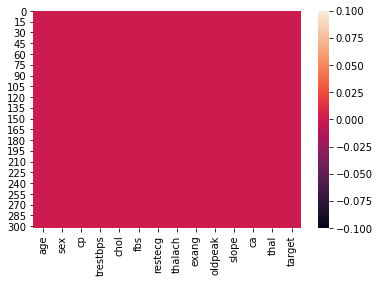

In [12]:
sns.heatmap(df.isnull())

# transforming nominal values to targeterical so as to get the better bivariate analysis and correlation between variables.


#tranforming the values(1,2,3,4) to presence(1) and 0 for absent

In [13]:
df['target'] = df['target'].apply(lambda row: 0 if row==0 else 1)
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

In [14]:
# extracting category cols and targeterical cols
cat_col =[]
for col, i in df.drop(['target'], axis=1).iteritems():
    if i.dtype == 'object':
        cat_col.append(col)
        
cat_col        

['ca', 'thal']

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
list1=[
 'ca',
 'thal']
for i in list1:
    df[i]=le.fit_transform(df[i])
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0


In [17]:
df_cor=df.corr()
df_cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.300361,0.116196,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.116008,0.354882,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.207846,0.263484,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.095260,0.120810,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.083958,0.015502,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145757,0.073611,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.096434,0.019051,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.229203,-0.266998,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.126816,0.324731,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.238164,0.319737,0.424510


<AxesSubplot:>

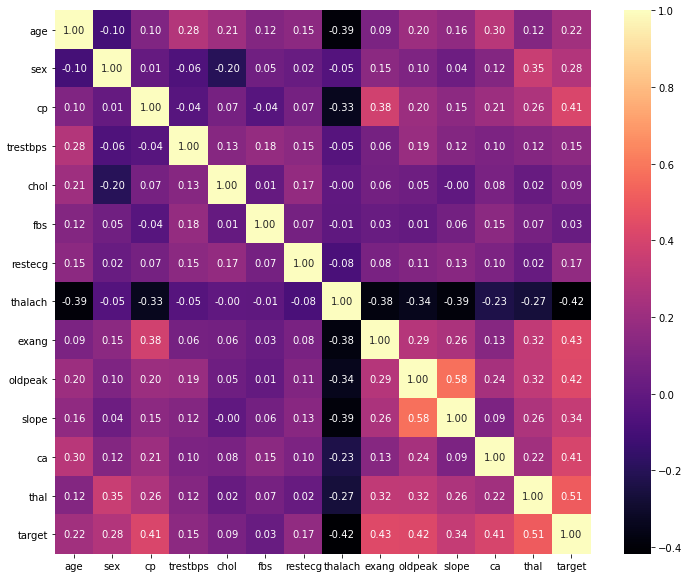

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

key observations here
1. slope and oldpeak are highly correlated with each other
2. thal is highly correlated with target
3. all variables are positively correlated with target variable (target) other than thalach
4. thalach is negitively correlated with target variable (target)

# Data Visualization

Univariate Analysis & Bivariate Analysis

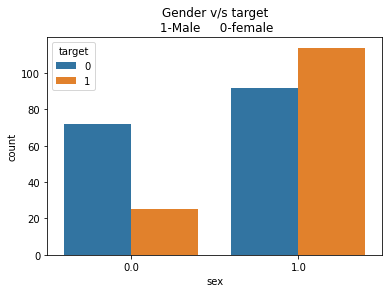

In [19]:
sns.countplot(x ='sex',hue='target', data = df)
plt.title('Gender v/s target\n 1-Male     0-female')
plt.show()

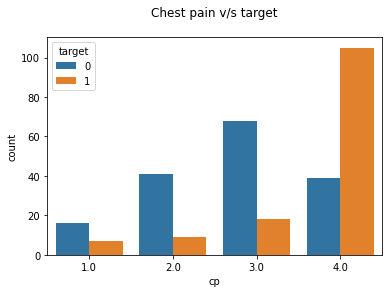

In [20]:
sns.countplot(x ='cp',hue='target', data = df)
plt.title('Chest pain v/s target\n ')
plt.show()

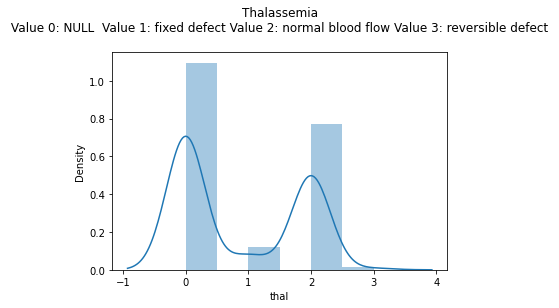

In [21]:
sns.distplot(df["thal"])
plt.title("Thalassemia\n Value 0: NULL  Value 1: fixed defect Value 2: normal blood flow Value 3: reversible defect \n")
plt.show()

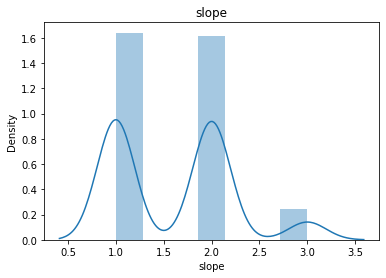

In [22]:
sns.distplot(df["slope"])
plt.title("slope")
plt.show()

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

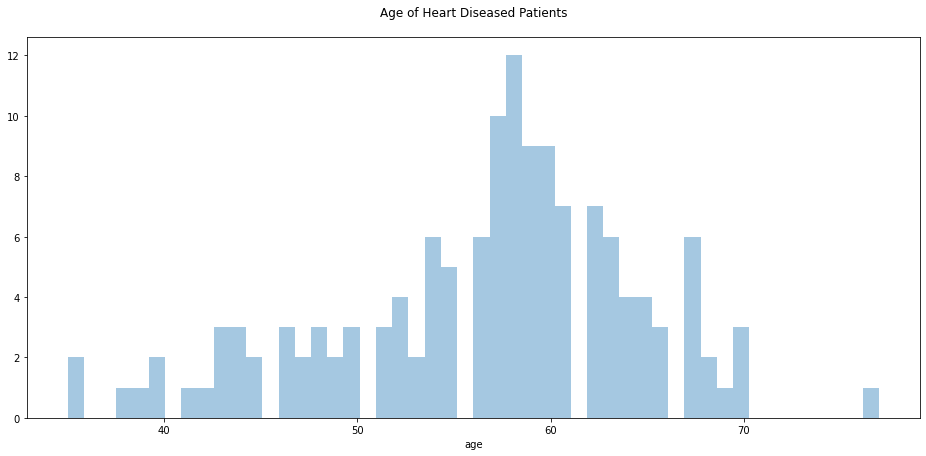

In [23]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

above analysis suggests the persons having age btween 54-64 have heart disease the most 

Text(0.5, 1.0, 'Cholestrol of Heart Diseased Patients\n')

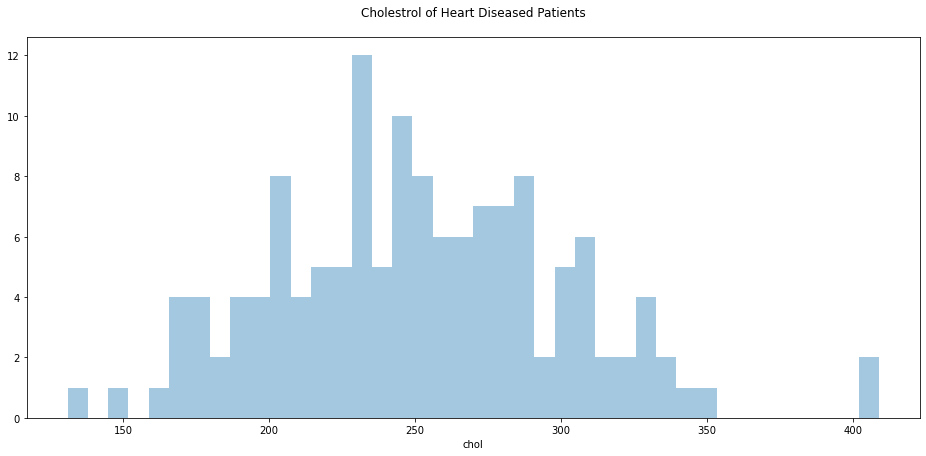

In [24]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['chol'],kde=False,bins=40)
plt.title('Cholestrol of Heart Diseased Patients\n')


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

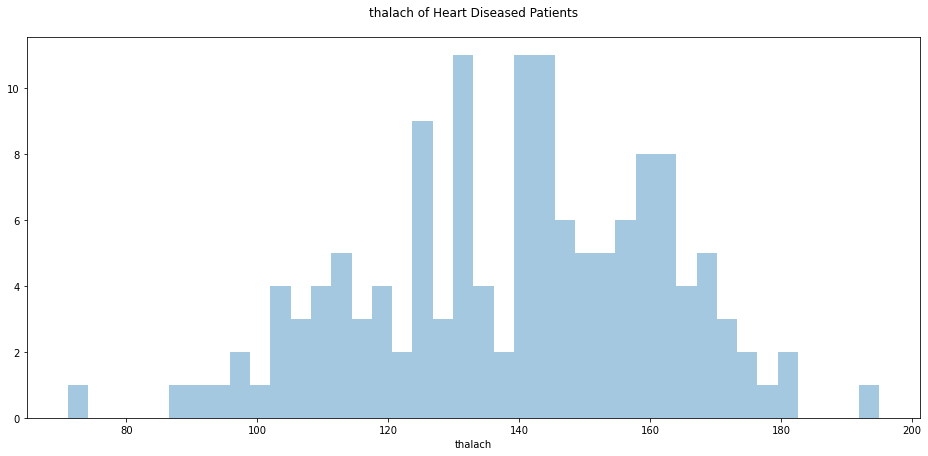

In [25]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

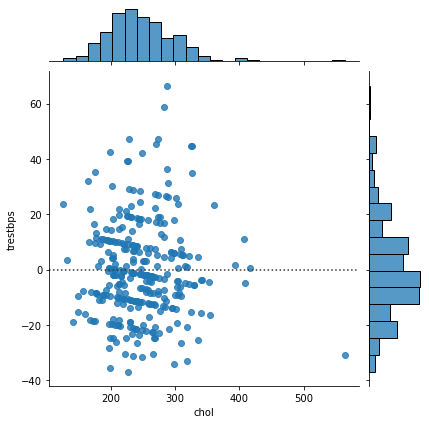

In [26]:
sns.jointplot(data=df,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )

Text(0.5, 1.0, 'ca and age correlation with target\n Male \t Female')

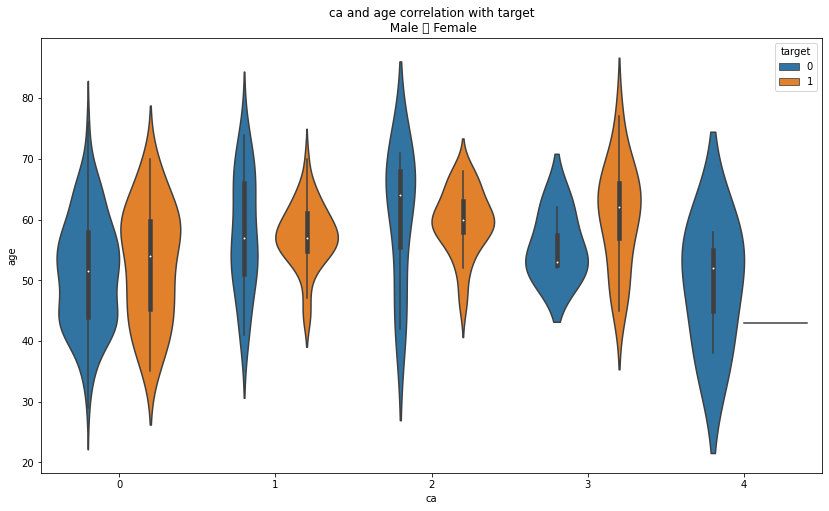

In [27]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df,x='ca',y='age',hue='target')
plt.title("ca and age correlation with target\n Male \t Female")

Text(0.5, 1.0, 'cp and thalach correlation with target\n Male         Female')

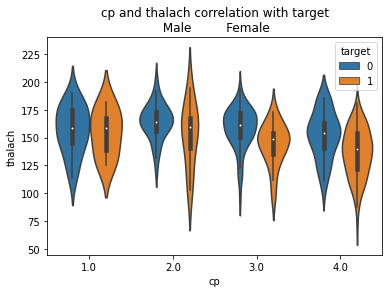

In [28]:
sns.violinplot(data=df,x='cp',y='thalach',hue='target')
plt.title("cp and thalach correlation with target\n Male         Female")

Text(0.5, 1.0, 'exang and oldpeak correlation with target\n Male         Female')

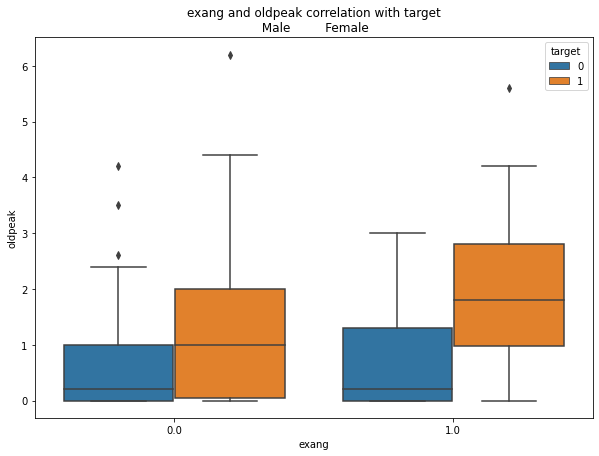

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='exang',y='oldpeak',hue='target')
plt.title("exang and oldpeak correlation with target\n Male         Female")

# plotting the outliers

<AxesSubplot:>

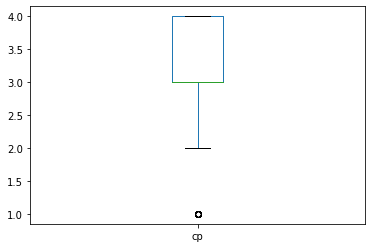

In [30]:
df["cp"].plot.box()

<AxesSubplot:>

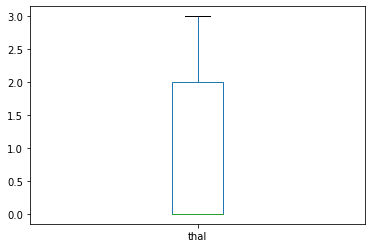

In [31]:
df["thal"].plot.box()

<AxesSubplot:>

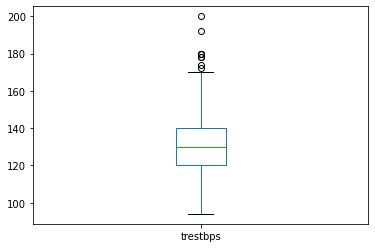

In [32]:
df["trestbps"].plot.box()

<AxesSubplot:>

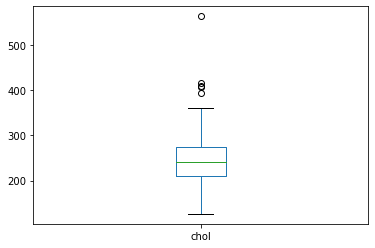

In [33]:
df["chol"].plot.box()

<AxesSubplot:>

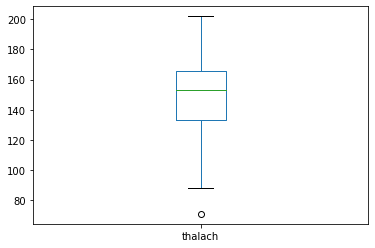

In [34]:
df["thalach"].plot.box()

All the above boxplot shows there are not much outliers present 

In [35]:
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(df))
print(z)
threshold=3
print(np.where(z>3))

[[0.94872647 0.68620244 2.25177456 ... 0.71312935 0.15331686 0.92063075]
 [1.39200191 0.68620244 0.87798549 ... 2.27412678 0.87901666 1.08621182]
 [1.39200191 0.68620244 0.87798549 ... 1.27837473 1.18565038 1.08621182]
 ...
 [0.28381332 0.68620244 0.87798549 ... 0.28262269 1.18565038 1.08621182]
 [0.28381332 1.4572959  1.20852121 ... 0.28262269 0.87901666 1.08621182]
 [1.82174501 0.68620244 0.16526786 ... 3.26987882 0.87901666 0.92063075]]
(array([ 48,  91, 121, 123, 126, 152, 166, 181, 188, 192, 245, 287, 302]), array([ 4,  9,  4,  9,  3,  4, 11,  4,  3, 11,  7, 11, 11]))


In [37]:
df_new=df[(z<3).all(axis=1)]

In [38]:
df_new.shape , df.shape

((290, 14), (303, 14))

In [39]:
# dividing the x varaibles features from y variable target (Attrition)
x=df_new.drop(columns=["target"])
y=df_new[["target"]]

In [40]:
print(x.shape ,"\t" , y.shape)

(290, 13) 	 (290, 1)


# To check the distribution of skewness

In [41]:
df_new.skew()  # shows  very little skewness

age        -0.186325
sex        -0.806737
cp         -0.831791
trestbps    0.527410
chol        0.249827
fbs         2.028954
restecg     0.041601
thalach    -0.473920
exang       0.738544
oldpeak     0.994311
slope       0.508254
ca          1.226241
thal        0.398096
target      0.195020
dtype: float64

In [42]:
# removing skewness by transforming data
from sklearn.preprocessing import power_transform

In [43]:
x=power_transform(x,method='yeo-johnson')

# Model Training

Logistic REgression

In [44]:
# scaling the input variable
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
scaledX=minmax.fit_transform(x)

In [45]:
# importing our model libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [55]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i,stratify=y)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 91.78082191780823 Random state 69


In [56]:
# breaking out input and output variable into train and test data with bst random state
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=69,stratify=y)

In [57]:
x_train.shape , y_train.shape,x_test.shape,y_test.shape

((217, 13), (217, 1), (73, 13), (73, 1))

In [58]:
#using algorithms in for loops and finding cross validation score
model=[LogisticRegression(),AdaBoostClassifier(),GradientBoostingClassifier(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Accuracy score of " , m , "is " , accuracy_score(y_test,y_pred))
    print("confusion matrix of " , m , "is \n",confusion_matrix(y_test,y_pred))
    print("classification report of " , m, "is \n",classification_report(y_test,y_pred))
    print("**********************************************************************\n")

Accuracy score of  LogisticRegression() is  0.9178082191780822
confusion matrix of  LogisticRegression() is 
 [[37  3]
 [ 3 30]]
classification report of  LogisticRegression() is 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.91      0.91      0.91        33

    accuracy                           0.92        73
   macro avg       0.92      0.92      0.92        73
weighted avg       0.92      0.92      0.92        73

**********************************************************************

Accuracy score of  AdaBoostClassifier() is  0.821917808219178
confusion matrix of  AdaBoostClassifier() is 
 [[33  7]
 [ 6 27]]
classification report of  AdaBoostClassifier() is 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.79      0.82      0.81        33

    accuracy                           0.82        73
   macro avg       0.8

# hyperparameter tuning

In [59]:
grid={"C":[1,10], "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr=LogisticRegression()
clf=GridSearchCV(lr,grid,cv=10)
clf.fit(x_train,y_train)

print("hpyerparameter tuning :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

hpyerparameter tuning :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.8196969696969697


In [60]:
# Logistic Reression with best parameters 
lr=LogisticRegression(C=1,penalty='l2',random_state=69)
lr.fit(x_train,y_train)
lr.score=(x_train,y_train)
predlr=lr.predict(x_test)
print("accuracy score",accuracy_score(y_test,predlr))
print("confusion matrix\n",confusion_matrix(y_test,predlr))
print("classification report",classification_report(y_test,predlr))

accuracy score 0.9178082191780822
confusion matrix
 [[37  3]
 [ 3 30]]
classification report               precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.91      0.91      0.91        33

    accuracy                           0.92        73
   macro avg       0.92      0.92      0.92        73
weighted avg       0.92      0.92      0.92        73



In [61]:
# cross validating Logistic Regression
score=cross_val_score(lr,scaledX,y,cv=4,scoring='accuracy')
print("Cross Validation Score : ", score,"\n")
print("Mean" , score.mean())
print("Standard Deviation" , score.std())

Cross Validation Score :  [0.8630137  0.89041096 0.80555556 0.83333333] 

Mean 0.8480783866057838
Standard Deviation 0.03178332101587019


# Conclusion

LogisticRegression is performing best among all above with accuaracy score .92. 

In [62]:
from sklearn.metrics import roc_curve,roc_auc_score

In [63]:
# cross validate models
model=[LogisticRegression(),AdaBoostClassifier(),GradientBoostingClassifier(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    score=cross_val_score(m,scaledX,y,cv=4,scoring='roc_auc')
    print("Score of " , m , "is: ")
    print("Score" , score)
    print("Mean score" , score.mean())
    print("Standard Deviation is " , score.std())
    print("**********************************************************************\n")

Score of  LogisticRegression() is: 
Score [0.90606061 0.94166667 0.85859375 0.90753691]
Mean score 0.9034644825660451
Standard Deviation is  0.02956397306441424
**********************************************************************

Score of  AdaBoostClassifier() is: 
Score [0.90378788 0.92424242 0.79921875 0.86324786]
Mean score 0.8726242290695416
Standard Deviation is  0.0477281146970103
**********************************************************************

Score of  GradientBoostingClassifier() is: 
Score [0.90606061 0.92045455 0.80078125 0.88888889]
Mean score 0.8790463226010101
Standard Deviation is  0.04654758353313339
**********************************************************************

Score of  GaussianNB() is: 
Score [0.89621212 0.94242424 0.88515625 0.8951049 ]
Mean score 0.9047243771853146
Standard Deviation is  0.022187746493406234
**********************************************************************

Score of  DecisionTreeClassifier() is: 
Score [0.73863636 0.81439394

In [64]:
# Create ROC Graph
#lg=LogisticRegression()
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

In [65]:
print(fpr,"\n",tpr,"\n",thresholds)

[0.    0.    0.    0.025 0.025 0.075 0.075 0.125 0.125 0.3   0.3   0.725
 0.725 1.   ] 
 [0.         0.03030303 0.75757576 0.75757576 0.87878788 0.87878788
 0.90909091 0.90909091 0.93939394 0.93939394 0.96969697 0.96969697
 1.         1.        ] 
 [1.98154469 0.98154469 0.7737878  0.75858264 0.66277593 0.56036788
 0.52291753 0.44316755 0.4244572  0.26635531 0.24679906 0.08191421
 0.07374987 0.03146556]


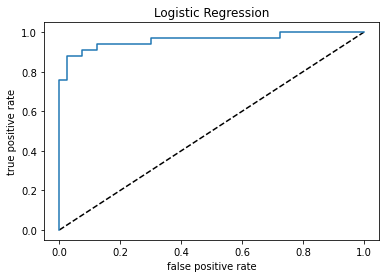

In [66]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Logistic Regression")
plt.show()

In [67]:
auc_score=roc_auc_score(y_test,predlr)

In [68]:
auc_score 

0.9170454545454546

# Saving the model- Serialization

In [69]:
# saving the prediction model

import pickle
filename="HeartDisease.pkl"
pickle.dump(predlr,open(filename,'wb'))